In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('C:/Users/User/Quantum internship/internship_train.csv')

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [35]:
y_train = train_data.target
y_train.head()

0    20.107472
1    61.763713
2    74.651162
3    69.424645
4    66.767304
Name: target, dtype: float64

In [34]:
X_train = train_data.iloc[:,:-1].copy()
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419


In [14]:
X_test = pd.read_csv('C:/Users/User/Quantum internship/internship_hidden_test.csv')
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [36]:
models = [
    [ linear_model.Lasso(), { 'alpha': [0.5,0.6,0.7,0.8,0.9,1] } ],
    [ linear_model.LinearRegression(), {}]
]

In [59]:
min_score = -1
best_clf = -1
for model in models:
    for cv_try in range (2, 11):
        clf = GridSearchCV(estimator=model[0], param_grid=model[1], scoring='neg_root_mean_squared_error', cv=cv_try)
        clf.fit(X_train, y_train)
        if min_score == -1 or min_score > clf.best_score_*(-1):
            min_score = clf.best_score_*(-1)
            best_clf = clf

In [78]:
print(f'Best classifier: {best_clf.best_estimator_}')
print(f'Scorer function: {best_clf.scorer_}')
print(f'RMSE: {best_clf.best_score_*(-1)}')
result_data = pd.Series(best_clf.predict(X_test))
result_data.to_csv('C:/Users/User/Quantum internship/result_test.csv')
result_data

Best classifier: Lasso(alpha=1)
Scorer function: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
RMSE: 28.897628140155437


0       49.820471
1       50.337998
2       50.199389
3       49.786799
4       49.830449
          ...    
9995    50.076251
9996    50.008256
9997    50.234953
9998    50.558509
9999    50.190362
Length: 10000, dtype: float64

<AxesSubplot:ylabel='Density'>

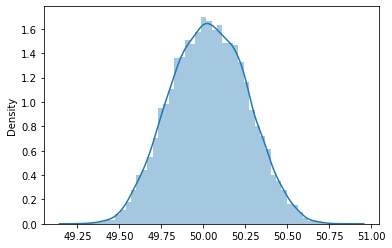

In [74]:
import seaborn as sns

sns.distplot(result_data)